# MapExtrakt Usage

> First import your model

In [12]:
import torchvision
model = torchvision.models.resnext50_32x4d(pretrained=True)

> Import MapExtract's Feature Extractor

In [13]:
from MapExtrakt import FeatureExtractor

fe = FeatureExtractor(model)


### Set image to be analysed - input can be PIL Image, Numpy array or filepath. We are using the path

In [3]:
fe.set_image("cat.jpg")

### Total number or layers available can be viewed

In [4]:
fe.layers

15

### Along with total cells per layer

In [5]:
fe.get_cells(layer_no=10)

255

### Total cells over all layers

In [6]:
fe.get_total_cells()


2801

# Displaying Maps

### Basic layer maps

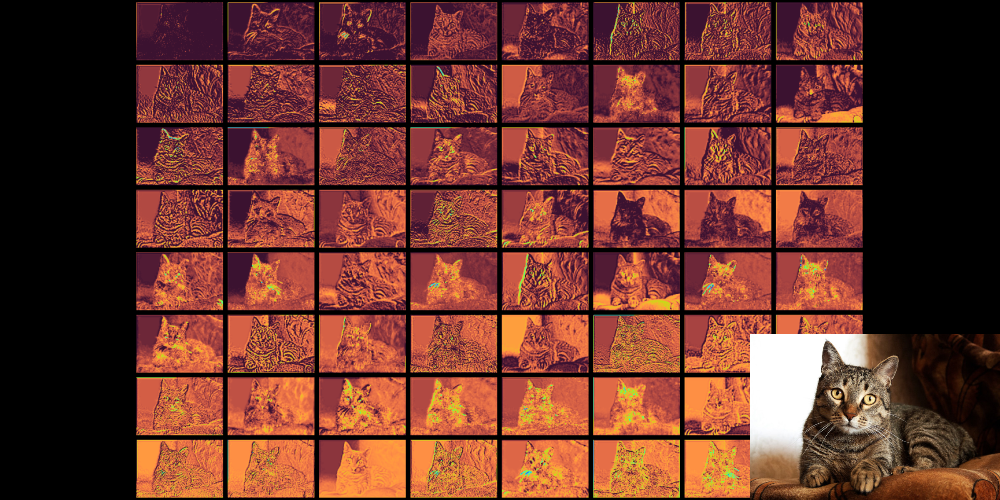

In [7]:
img = fe.display_from_map(layer_no=2, out_type="pil", colourize=20, outsize=(1000,500), border=0.03, picture_in_picture=True)
img.save("example_output.jpg")
img

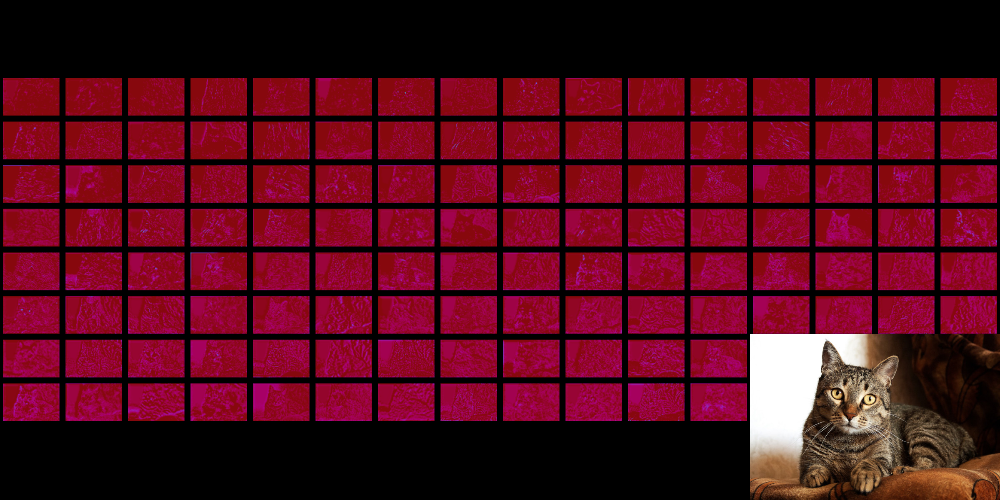

In [8]:
img = fe.display_from_map(layer_no=5, out_type="pil", colourize=15, outsize=(1000,500), border=0.06, picture_in_picture=True)
img.save("example_output1.jpg")
img

### Individual cell maps

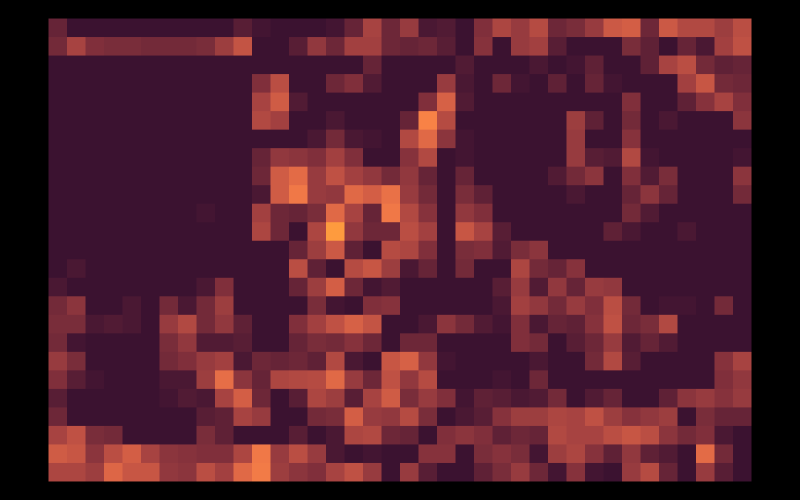

In [9]:
img = fe.display_from_map(layer_no=8, cell_no=20, out_type="pil", colourize=20, outsize=(800,500), border=0.03, picture_in_picture=False)
img.save("example_output2.jpg")
img

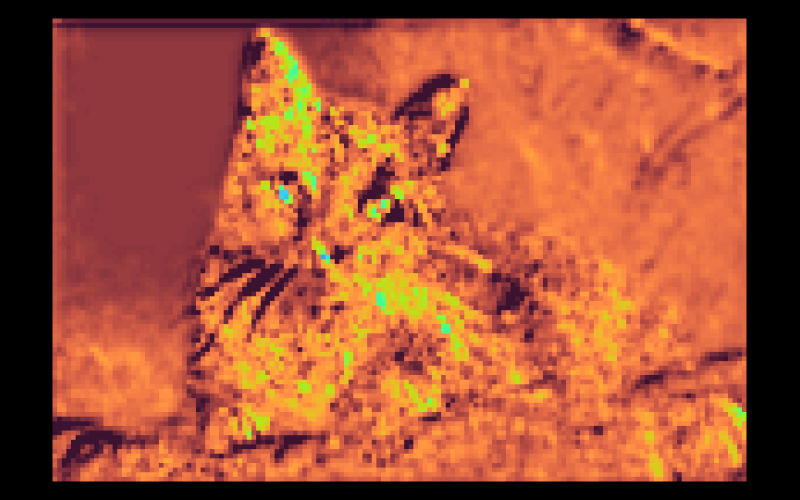

In [10]:
img = fe.display_from_map(layer_no=2, cell_no=50, out_type="pil", colourize=20, outsize=(800,500), border=0.03, picture_in_picture=False)
img.save("example_output3.jpg")
img

### Setting a new image

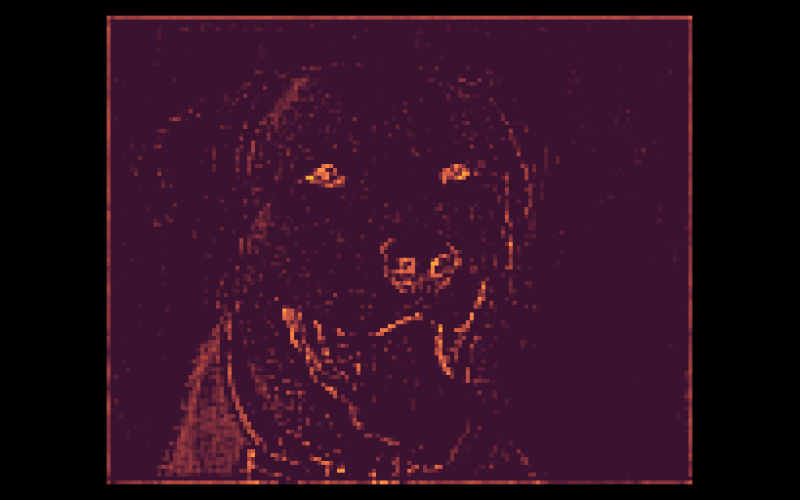

In [11]:
fe.set_image("dog.jpg")
img = fe.display_from_map(layer_no=2, cell_no=0, out_type="pil", colourize=20, outsize=(800,500), border=0.03, picture_in_picture=False)
img

### Changing border and displaying with maps relative size (no size specified) and new colourize style

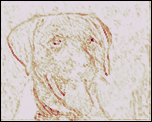

In [12]:
img = fe.display_from_map(layer_no=3, cell_no=10, out_type="pil", colourize=18, border=0.00, picture_in_picture=False)
img

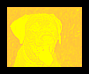

In [13]:
img = fe.display_from_map(layer_no=4, cell_no=127, out_type="pil", colourize=8, border=0.1, picture_in_picture=False)
img

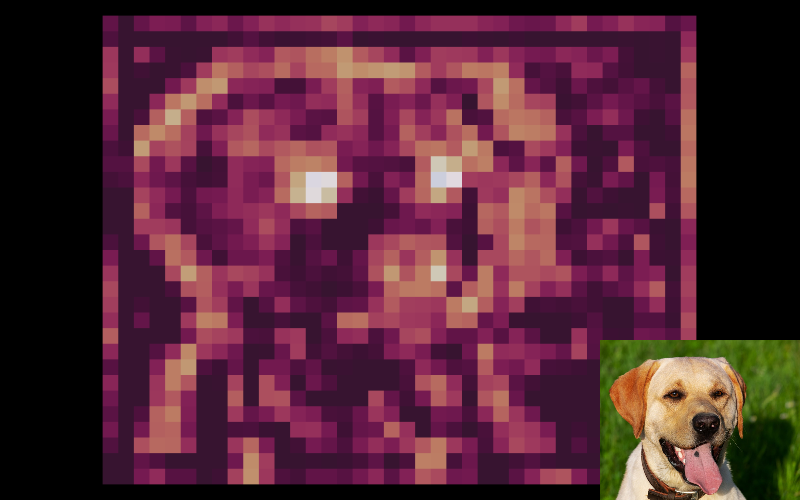

In [14]:
img = fe.display_from_map(layer_no=12, cell_no=255, out_type="pil", colourize=19, outsize=(800,500), border=0.02, picture_in_picture=True)
img

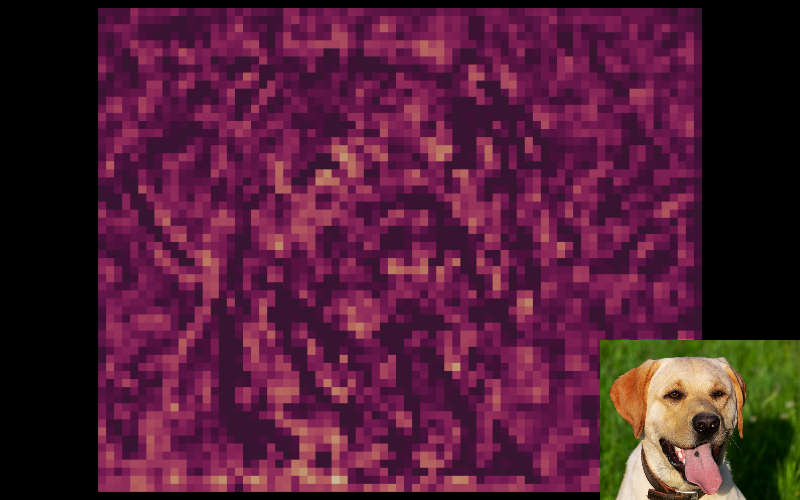

In [15]:
img = fe.display_from_map(layer_no=6, cell_no=122, out_type="pil", colourize=19, outsize=(800,500), border=0.02, picture_in_picture=True)
img

### Save all layer maps to folder

In [14]:
fe.set_image("pug.jpg")

_ = [fe.display_from_map(layer_no=x, out_type="pil",outsize=(1500,800))
     .save(f"./pug_layers/layer{x}.jpg") for x in range(fe.layers)]

### Or save all cells from a layer to folder

In [15]:
fe.set_image("bike.jpg")
layer = 3
_ = [fe.display_from_map(layer_no=layer, cell_no=x, out_type="pil", outsize=(200,150), picture_in_picture=False)
     .save(f"./pug_cells/layer{x}.jpg") for x in range(fe.get_cells(layer))]


### Writing to video

In [16]:
fe.write_video(out_size=(1500,1000), file_name="output1.mp4",
               write_text=True, picture_in_picture=True, draw_type="both")



Drawing Cells 2801 /2801   Total Time Taken 0:05:42    Time Left 0:00:00    [==============================] 100.0 %  
Video saved as output1.mp4
